# Titanic Dataset Analysis

This notebook performs exploratory data analysis on the Titanic dataset to understand survival patterns and relationships between variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Set style for better visualizations
sns.set_theme()

# Load the dataset
df = pd.read_csv('data/train.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


## Basic Dataset Information

In [2]:
print("\nShape of the dataset:", df.shape)
print("\nColumns in the dataset:")
print(df.columns.tolist())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())


Shape of the dataset: (891, 12)

Columns in the dataset:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
PassengerId      0
Survived     

## Data Cleaning

In [3]:
# Create a copy to avoid modifying the original data
df_clean = df.copy()

# Handle missing values
# Fill missing age values with median
age_imputer = SimpleImputer(strategy='median')
df_clean['Age'] = age_imputer.fit_transform(df_clean[['Age']])

# Fill missing embarked values with mode
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

# Fill missing cabin values with 'Unknown'
df_clean['Cabin'].fillna('Unknown', inplace=True)

# Convert categorical variables
df_clean['Sex'] = pd.Categorical(df_clean['Sex']).codes
df_clean['Embarked'] = pd.Categorical(df_clean['Embarked']).codes

print("Data cleaning completed!")

Data cleaning completed!


## Survival Analysis

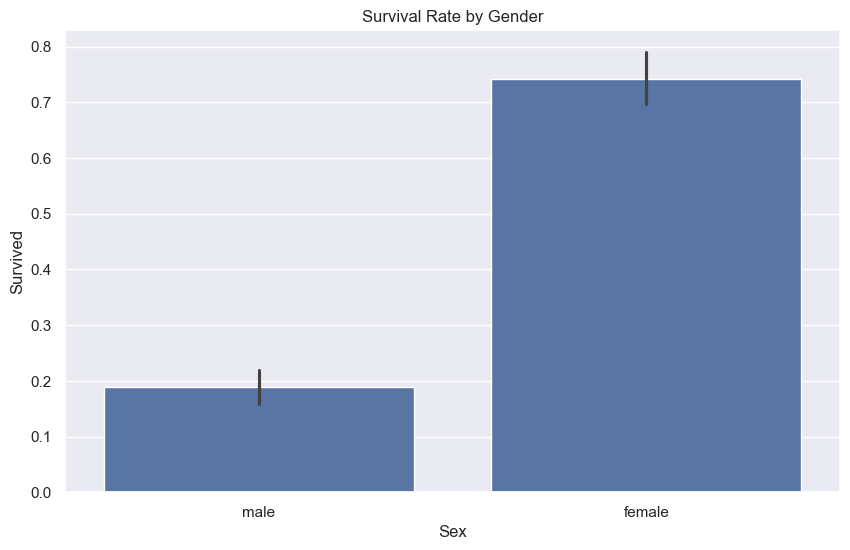

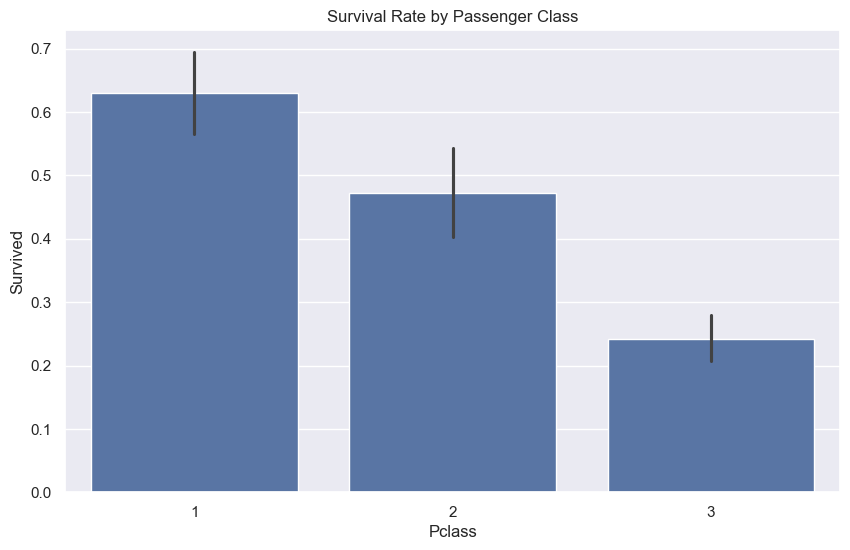

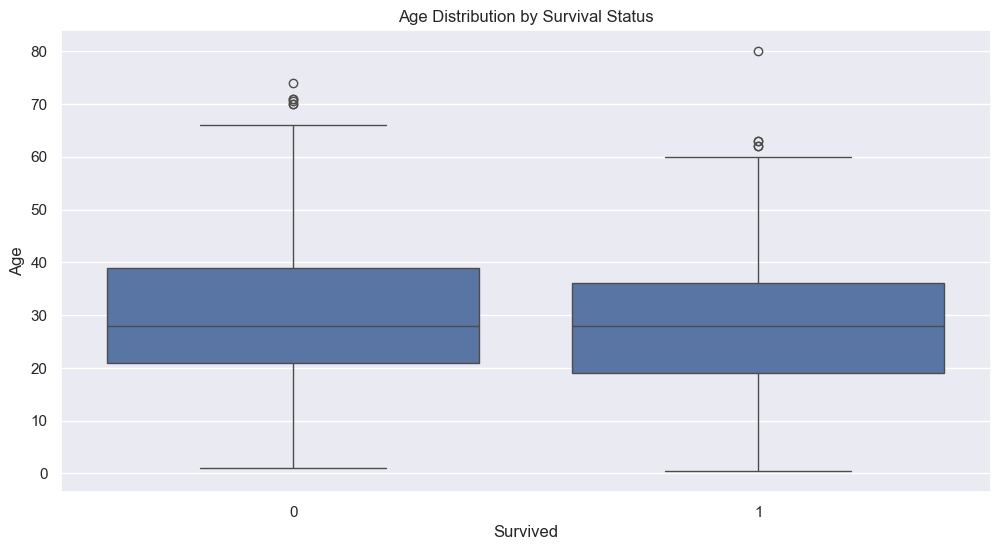

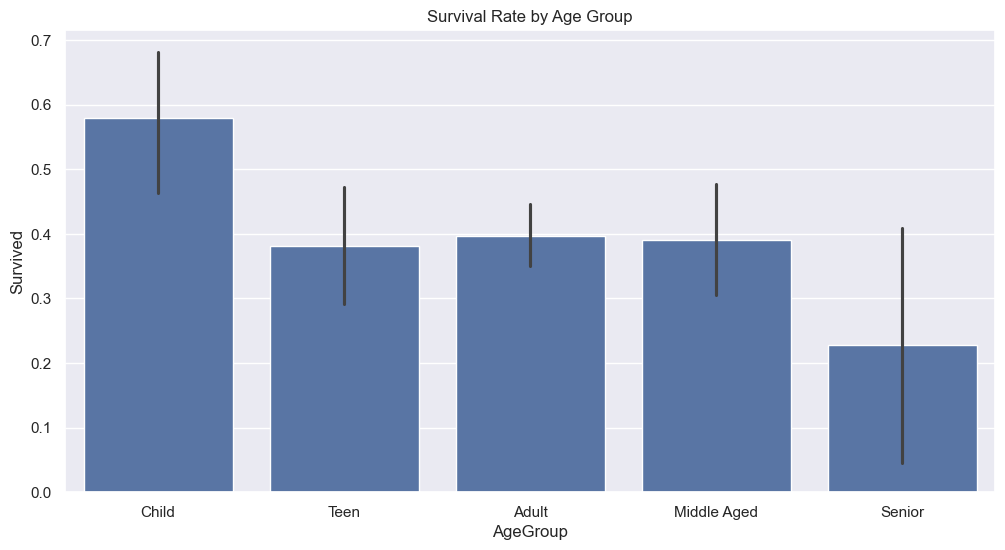

In [4]:
# Survival by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age distribution of survivors vs non-survivors
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

# Survival by Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

## Correlation Analysis

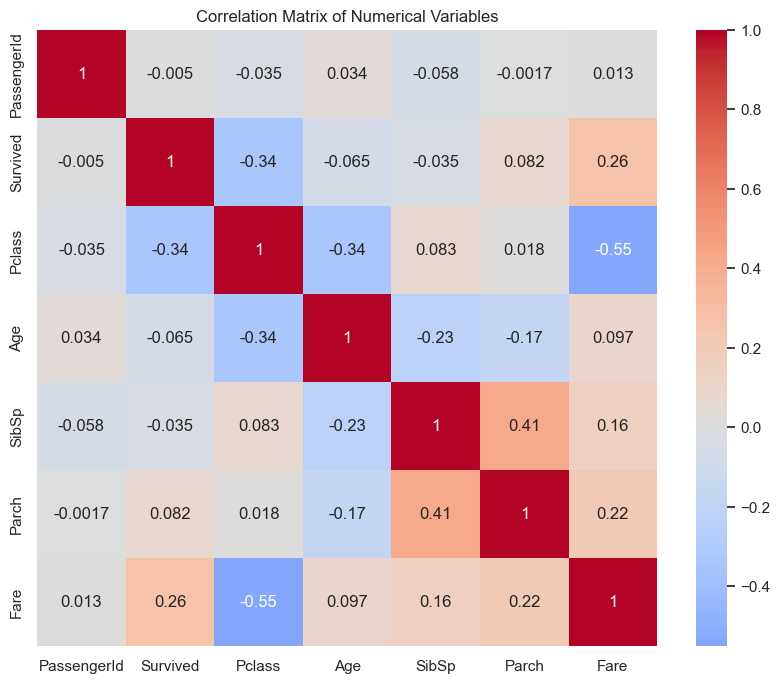

In [5]:
# Select numerical columns
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()